In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import class_weight
import sklearn.metrics as metrics

import matplotlib.image as mpimg
from skimage.io import imread, imshow

# distributions
from scipy.stats import randint 
from scipy.stats import uniform

from imblearn.over_sampling import BorderlineSMOTE

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

###### Voor Tensorflow-GPU ########
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using TensorFlow backend.


## Customer satisfaction

Een bank probeert vroegtijdig ontevreden klanten op te sporen en wil daarvoor deep learning toepassen.
Gegeven is een dataset "customersatisfaction.csv" met geanonimiseerde gegevens van hun klanten en de bijhorende klantentevredenheid. De features zelf werden ook geanonimiseerd.
De target kolom is de variabele die voorspeld moet worden. 1 staat voor ontevreden klanten, 0 staat voor tevreden klanten.

Train een neuraal netwerk dat een zo hoog mogelijke accuraatheid haalt. 
Zorg dat er 10000 samples in de test set aanwezig zijn en zet de random_state op 0.

# Conclusies staan helemaal onderaan

In [2]:
dataset = pd.read_csv('./customersatisfaction.csv')

dataset.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [3]:
# Uitwerking opdracht customer satisfaction
dataset.describe()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
y = dataset["TARGET"]
X = dataset.drop(["TARGET", "ID"], axis=1).astype(np.float)
display(y.head())
display(X.head())


0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [5]:
#gebalanceerde dataset? --> waarschijnlijk niet, zie gemiddelde van TARGET

#print(np.bincount(dataset.TARGET))

nr_tevreden = dataset.TARGET[dataset["TARGET"]==0].count()
nr_ontevreden = dataset.TARGET[dataset["TARGET"]==1].count()
print("tevreden :", nr_tevreden)
print("ontevreden :", nr_ontevreden)
print("Zeer ongebalaneerde dataset : %.1f%%/%.1f%%"%(nr_tevreden*100/len(dataset), nr_ontevreden*100/len(dataset)))

#print(nr_tevreden/dataset.count()[0])

tevreden : 73012
ontevreden : 3008
Zeer ongebalaneerde dataset : 96.0%/4.0%


## Netwerk trainen zonder extra maatregelen voor ongebalanceerde dataset

In [6]:
# splitsen in test set en training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)

y_train_cat = to_categorical(y_train)

print("Shapes:")
print("X_train : ", X_train.shape)
print("X_test  : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_train_cat : ", y_train_cat.shape)
print("y_test  : ", y_test.shape)


Shapes:
X_train :  (66020, 369)
X_test  :  (10000, 369)
y_train :  (66020,)
y_train_cat :  (66020, 2)
y_test  :  (10000,)


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#check on normalisation
pd.DataFrame(X_train, columns=X.columns).describe()


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,...,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04,6.602000e+04
mean,-1.224239e-17,9.904225e-17,-1.463705e-17,9.632471e-18,-1.183879e-17,1.000916e-17,-1.318411e-18,-5.973208e-18,-1.479849e-19,-6.861118e-18,...,3.820701e-18,-1.116613e-17,-5.784864e-19,-4.587532e-18,5.515801e-19,-2.690634e-18,1.183879e-18,9.417220e-20,-3.605450e-18,-9.974182e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.634288e+01,-2.171722e+00,-5.356824e-02,-2.123663e-01,-2.179669e-01,-3.801641e-02,-4.196844e-02,-1.337639e-02,-1.574784e-02,-3.323274e-02,...,-6.282042e-03,-1.653676e-02,-1.240048e-02,-1.424060e-02,-1.509343e-02,-1.538252e-02,-1.126207e-02,-1.881433e-02,-1.985448e-02,-6.259091e-01
25%,3.794174e-02,-7.887958e-01,-5.356824e-02,-2.123663e-01,-2.179669e-01,-3.801641e-02,-4.196844e-02,-1.337639e-02,-1.574784e-02,-3.323274e-02,...,-6.282042e-03,-1.653676e-02,-1.240048e-02,-1.424060e-02,-1.509343e-02,-1.538252e-02,-1.126207e-02,-1.881433e-02,-1.985448e-02,-2.753705e-01
50%,3.794174e-02,-4.046498e-01,-5.356824e-02,-2.123663e-01,-2.179669e-01,-3.801641e-02,-4.196844e-02,-1.337639e-02,-1.574784e-02,-3.323274e-02,...,-6.282042e-03,-1.653676e-02,-1.240048e-02,-1.424060e-02,-1.509343e-02,-1.538252e-02,-1.126207e-02,-1.881433e-02,-1.985448e-02,-5.952163e-02
75%,3.794174e-02,5.173008e-01,-5.356824e-02,-2.123663e-01,-2.179669e-01,-3.801641e-02,-4.196844e-02,-1.337639e-02,-1.574784e-02,-3.323274e-02,...,-6.282042e-03,-1.653676e-02,-1.240048e-02,-1.424060e-02,-1.509343e-02,-1.538252e-02,-1.126207e-02,-1.881433e-02,-1.985448e-02,1.016387e-02
max,4.408847e-02,5.511200e+00,1.281750e+02,3.735449e+01,3.785624e+01,8.445209e+01,7.040372e+01,2.031264e+02,1.697052e+02,8.219309e+01,...,2.143078e+02,1.064154e+02,1.260322e+02,1.857809e+02,1.797046e+02,2.046101e+02,1.845852e+02,1.581826e+02,1.308093e+02,1.225023e+02


In [9]:
batch_size = 64
epochs = 25
dropoutrate = 0.0
input_dim = X_train.shape[1]
output_dim = y_train_cat.shape[1]

activation_hidden = 'relu' # activatiefunctie van de hidden layer neuronen
#activation_output = 'sigmoid'# activatie van de output layer neuronen
activation_output = 'softmax'# activatie van de output layer neuronen
initializer = 'RandomUniform' # type van kernel intializer

#loss = "binary_crossentropy"
loss = "categorical_crossentropy"

adam = tf.optimizers.Adam()
optimizer = adam

hidden_layers = 1
neurons_per_layer = 200

model = Sequential()
model.add(Dense(neurons_per_layer, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
for l in range(hidden_layers-1):
    model.add(Dense(neurons_per_layer, kernel_initializer=initializer,activation=activation_hidden))
    model.add(Dropout(dropoutrate))
model.add(Dense(output_dim, kernel_initializer=initializer,activation=activation_output))

model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               74000     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 74,402
Trainable params: 74,402
Non-trainable params: 0
_________________________________________________________________


In [10]:
# train the model
nr=len(X_train)
history = model.fit(X_train[:nr], y_train_cat[:nr], epochs=epochs, validation_split = 0.2,verbose=1)


Train on 52816 samples, validate on 13204 samples
Epoch 1/25
52816/52816 [==============================] - 4s 74us/sample - loss: 0.1511 - accuracy: 0.9605 - val_loss: 0.1427 - val_accuracy: 0.9590
Epoch 2/25
52816/52816 [==============================] - 3s 63us/sample - loss: 0.1415 - accuracy: 0.9614 - val_loss: 0.1439 - val_accuracy: 0.9590
Epoch 3/25
52816/52816 [==============================] - 3s 65us/sample - loss: 0.1415 - accuracy: 0.9613 - val_loss: 0.1473 - val_accuracy: 0.9593
Epoch 4/25
52816/52816 [==============================] - 4s 67us/sample - loss: 0.1386 - accuracy: 0.9614 - val_loss: 0.1408 - val_accuracy: 0.9593
Epoch 5/25
52816/52816 [==============================] - 4s 67us/sample - loss: 0.1367 - accuracy: 0.9614 - val_loss: 0.1419 - val_accuracy: 0.9593
Epoch 6/25
52816/52816 [==============================] - 4s 67us/sample - loss: 0.1354 - accuracy: 0.9614 - val_loss: 0.1423 - val_accuracy: 0.9592
Epoch 7/25
52816/52816 [==============================] 

Figure(864x432)


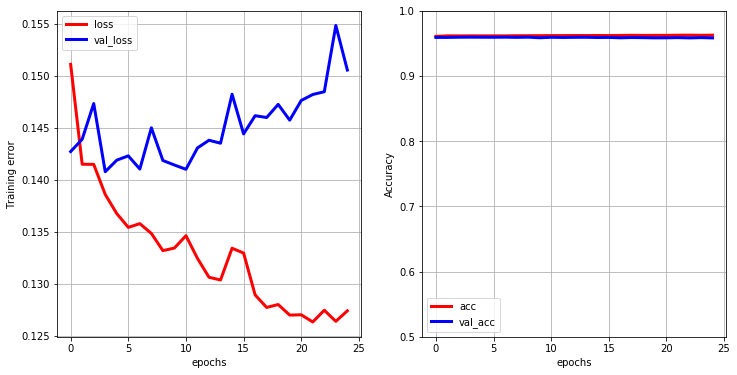

In [11]:
# Plot history

fig, axs = plt.subplots(1,2, figsize=(12,6))
print(fig)

#axs[0].rcParams['axes.labelsize'] = 15
axs[0].plot(history.history['loss'],'red',linewidth=3.0, label="loss")
axs[0].plot(history.history['val_loss'],'blue',linewidth=3.0, label="val_loss")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Training error')
axs[0].grid()

#axs[1].rcParams['axes.labelsize'] = 15
axs[1].plot(history.history['accuracy'],'red',linewidth=3.0, label="acc")
axs[1].plot(history.history['val_accuracy'],'blue',linewidth=3.0, label="val_acc")
axs[1].legend()
axs[1].set_ylim((0.5,1))
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')
axs[1].grid()


In [12]:
# Testen met test set
y_pred = model.predict_classes(X_test)
#print(y_pred)

print("Accuracy score op test-set : ", accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))

print("\nConfusion matrix")
cf = confusion_matrix(y_test, y_pred)
print(cf)

df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)


Accuracy score op test-set :  95.59


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9572
           1       0.22      0.01      0.02       428

    accuracy                           0.96     10000
   macro avg       0.59      0.50      0.50     10000
weighted avg       0.93      0.96      0.94     10000


Confusion matrix
[[9554   18]
 [ 423    5]]


Predicted,0,1
Actual,,
0,9554,18
1,423,5


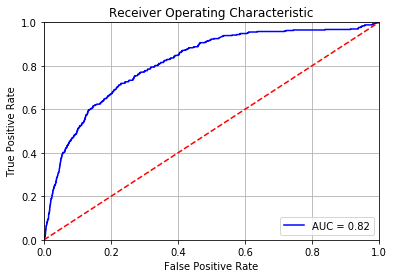

In [13]:
# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()


# Netwerk trainen met class-weigths van de ongebalanceerde dataset¶

In [14]:
batch_size = 64
epochs = 35
dropoutrate = 0.0
input_dim = X_train.shape[1]
output_dim = y_train_cat.shape[1]

activation_hidden = 'relu' # activatiefunctie van de hidden layer neuronen
#activation_output = 'sigmoid'# activatie van de output layer neuronen
activation_output = 'softmax'# activatie van de output layer neuronen
initializer = 'RandomUniform' # type van kernel intializer

#loss = "binary_crossentropy"
loss = "categorical_crossentropy"

adam = tf.optimizers.Adam()
optimizer = adam

hidden_layers = 1
neurons_per_layer = 200

model1 = Sequential()
model1.add(Dense(neurons_per_layer, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model1.add(Dropout(dropoutrate))
for l in range(hidden_layers-1):
    model1.add(Dense(neurons_per_layer, kernel_initializer=initializer,activation=activation_hidden))
    model1.add(Dropout(dropoutrate))
model1.add(Dense(output_dim, kernel_initializer=initializer,activation=activation_output))

model1.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               74000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 74,402
Trainable params: 74,402
Non-trainable params: 0
_________________________________________________________________


In [15]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
print(class_weights)
class_weights= dict(enumerate(class_weights))

history1 = model1.fit(X_train, y_train_cat, epochs=epochs, validation_split = 0.2,verbose=1, class_weight=class_weights)


[ 0.52033417 12.79457364]
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 52816 samples, validate on 13204 samples
Epoch 1/35
52816/52816 [==============================] - 4s 85us/sample - loss: 0.5825 - accuracy: 0.6921 - val_loss: 0.5721 - val_accuracy: 0.7757
Epoch 2/35
52816/52816 [==============================] - 4s 71us/sample - loss: 0.5581 - accuracy: 0.7197 - val_loss: 0.5735 - val_accuracy: 0.7286
Epoch 3/35
52816/52816 [==============================] - 4s 70us/sample - loss: 0.5513 - accuracy: 0.7267 - val_loss: 0.6009 - val_accuracy: 0.6282
Epoch 4/35
52816/52816 [==============================] - 4s 69us/sample - loss: 0.5346 - accuracy: 0.7325 - val_loss: 0.5879 - val_accuracy: 0.7555
Epoch 5/35
52816/52816 [==============================] - 4s 67us/sample - loss: 0.5319 - accuracy: 0.7307 - val_loss: 0.6136 - val_accuracy: 0.7909
Epoch 6/35
52816/52816 [==============================] - 4s 68us/sample - loss: 0.5252 - accuracy: 0.7379 - val_loss: 0.6515 - v

Figure(864x432)


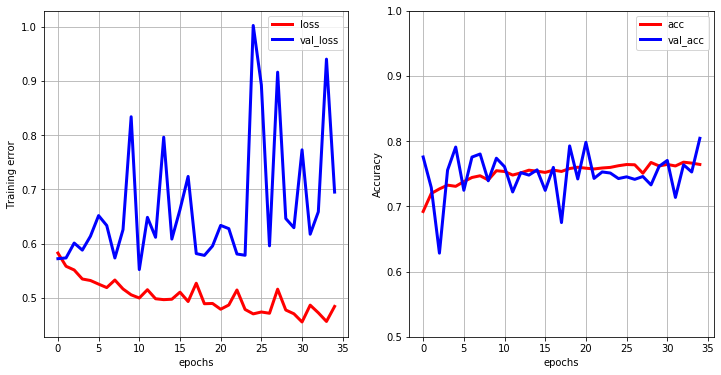

In [16]:
# Plot history

fig, axs = plt.subplots(1,2, figsize=(12,6))
print(fig)

#axs[0].rcParams['axes.labelsize'] = 15
axs[0].plot(history1.history['loss'],'red',linewidth=3.0, label="loss")
axs[0].plot(history1.history['val_loss'],'blue',linewidth=3.0, label="val_loss")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Training error')
axs[0].grid()

#axs[1].rcParams['axes.labelsize'] = 15
axs[1].plot(history1.history['accuracy'],'red',linewidth=3.0, label="acc")
axs[1].plot(history1.history['val_accuracy'],'blue',linewidth=3.0, label="val_acc")
axs[1].legend()
axs[1].set_ylim((0.5,1))
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')
axs[1].grid()


In [17]:
# Testen met test set
y_pred = model1.predict_classes(X_test)
#print(y_pred)

print("Accuracy score op test-set : ", accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))

print("\nConfusion matrix")
cf = confusion_matrix(y_test, y_pred)
print(cf)

df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)


Accuracy score op test-set :  80.35


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9572
           1       0.14      0.67      0.23       428

    accuracy                           0.80     10000
   macro avg       0.56      0.74      0.56     10000
weighted avg       0.95      0.80      0.86     10000


Confusion matrix
[[7748 1824]
 [ 141  287]]


Predicted,0,1
Actual,,
0,7748,1824
1,141,287


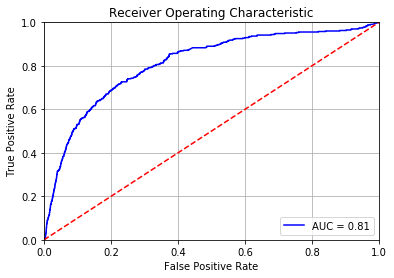

In [18]:
# ROC
probs = model1.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

## Netwerk trainen met resampling van de ongebalanceerde dataset

In [19]:
# splitsen in test set en training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)

X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)
y_resampled_cat = to_categorical(y_resampled)

print("Shapes:")
print("X_train : ", X_train.shape)
print("X_test  : ", X_test.shape)

print("y_train : ", y_train.shape)
print("y_test  : ", y_test.shape)

print("X_resampled : ", X_resampled.shape)
print("y_resampled  : ", y_resampled.shape)
print("y_resampled_cat  : ", y_resampled_cat.shape)


Shapes:
X_train :  (66020, 369)
X_test  :  (10000, 369)
y_train :  (66020,)
y_test  :  (10000,)
X_resampled :  (126880, 369)
y_resampled  :  (126880,)
y_resampled_cat  :  (126880, 2)


In [24]:
#check balanced state of new dataset
print(np.bincount(y_resampled), '--> compleet gebalanceerd nu')

[63440 63440] --> compleet gebalanceerd nu


In [25]:
scaler = StandardScaler()
scaler.fit(X_resampled)
Xr_train = scaler.transform(X_resampled)
Xr_test = scaler.transform(X_test)

#check on normalisation
pd.DataFrame(Xr_train, columns=X.columns).describe()


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,...,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05,1.268800e+05
mean,-6.272130e-18,-1.971241e-16,-6.272130e-18,2.822459e-17,6.697739e-17,-6.496135e-18,-1.814438e-17,-8.176170e-18,-7.280151e-18,-1.332828e-17,...,-2.800058e-19,-3.192066e-18,-6.048125e-18,-5.600116e-19,2.408050e-18,-2.240046e-18,-4.256088e-18,-4.648096e-18,3.976082e-18,-1.093143e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.963207e+01,-2.580634e+00,-4.990279e-02,-2.113599e-01,-2.197747e-01,-4.165781e-02,-4.352452e-02,-4.891190e-02,-4.822230e-02,-4.091140e-02,...,-4.531457e-03,-1.192788e-02,-8.944656e-03,-1.027184e-02,-1.088693e-02,-1.109542e-02,-8.123558e-03,-1.357041e-02,-1.432051e-02,-7.213612e-01
25%,3.649589e-02,-8.570349e-01,-4.990279e-02,-2.113599e-01,-2.197747e-01,-4.165781e-02,-4.352452e-02,-4.891190e-02,-4.822230e-02,-4.091140e-02,...,-4.531457e-03,-1.192788e-02,-8.944656e-03,-1.027184e-02,-1.088693e-02,-1.109542e-02,-8.123558e-03,-1.357041e-02,-1.432051e-02,-3.235248e-01
50%,3.649589e-02,-1.681049e-01,-4.990279e-02,-2.113599e-01,-2.197747e-01,-4.165781e-02,-4.352452e-02,-4.891190e-02,-4.822230e-02,-4.091140e-02,...,-4.531457e-03,-1.192788e-02,-8.944656e-03,-1.027184e-02,-1.088693e-02,-1.109542e-02,-8.123558e-03,-1.357041e-02,-1.432051e-02,-6.645790e-02
75%,3.649589e-02,5.597342e-01,-4.990279e-02,-2.113599e-01,-2.197747e-01,-4.165781e-02,-4.352452e-02,-4.891190e-02,-4.822230e-02,-4.091140e-02,...,-4.531457e-03,-1.192788e-02,-8.944656e-03,-1.027184e-02,-1.088693e-02,-1.109542e-02,-8.123558e-03,-1.357041e-02,-1.432051e-02,9.346849e-02
max,4.340866e-02,5.626979e+00,1.765118e+02,3.966269e+01,4.287710e+01,1.079711e+02,9.302022e+01,1.394373e+02,1.081031e+02,1.004363e+02,...,2.970974e+02,1.475255e+02,1.747209e+02,2.575459e+02,2.491218e+02,2.836461e+02,2.558912e+02,2.192833e+02,1.813377e+02,1.593392e+02


In [26]:
batch_size = 32
epochs = 35
dropoutrate = 0.0
input_dim = Xr_train.shape[1]
output_dim = y_resampled_cat.shape[1]

activation_hidden = 'relu' # activatiefunctie van de hidden layer neuronen
#activation_output = 'sigmoid'# activatie van de output layer neuronen
activation_output = 'softmax'# activatie van de output layer neuronen
initializer = 'RandomUniform' # type van kernel intializer

#loss = "binary_crossentropy"
loss = "categorical_crossentropy"

optimizer = tf.optimizers.Adam()
 
hidden_layers = 2
neurons_per_layer = 200

model2 = Sequential()
model2.add(Dense(neurons_per_layer, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model2.add(Dropout(dropoutrate))
for l in range(hidden_layers-1):
    model2.add(Dense(neurons_per_layer, kernel_initializer=initializer,activation=activation_hidden))
    model2.add(Dropout(dropoutrate))
model2.add(Dense(output_dim, kernel_initializer=initializer,activation=activation_output))

model2.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               74000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 402       
Total params: 114,602
Trainable params: 114,602
Non-trainable params: 0
_________________________________________________________________


In [27]:
# train the model
nr=len(Xr_train)
history2 = model2.fit(Xr_train[:nr], y_resampled_cat[:nr], epochs=epochs, validation_split = 0.2,verbose=1)


Train on 101504 samples, validate on 25376 samples
Epoch 1/35
101504/101504 [==============================] - 8s 77us/sample - loss: 0.3506 - accuracy: 0.8519 - val_loss: 0.5746 - val_accuracy: 0.7991
Epoch 2/35
101504/101504 [==============================] - 7s 73us/sample - loss: 0.3014 - accuracy: 0.8740 - val_loss: 0.3438 - val_accuracy: 0.8715
Epoch 3/35
101504/101504 [==============================] - 7s 72us/sample - loss: 0.2816 - accuracy: 0.8818 - val_loss: 0.2768 - val_accuracy: 0.8958
Epoch 4/35
101504/101504 [==============================] - 7s 74us/sample - loss: 0.2684 - accuracy: 0.8887 - val_loss: 0.2800 - val_accuracy: 0.9002
Epoch 5/35
101504/101504 [==============================] - 8s 77us/sample - loss: 0.2573 - accuracy: 0.8927 - val_loss: 0.3172 - val_accuracy: 0.8877
Epoch 6/35
101504/101504 [==============================] - 9s 84us/sample - loss: 0.2479 - accuracy: 0.8974 - val_loss: 0.2964 - val_accuracy: 0.8949
Epoch 7/35
101504/101504 [=================

Figure(864x432)


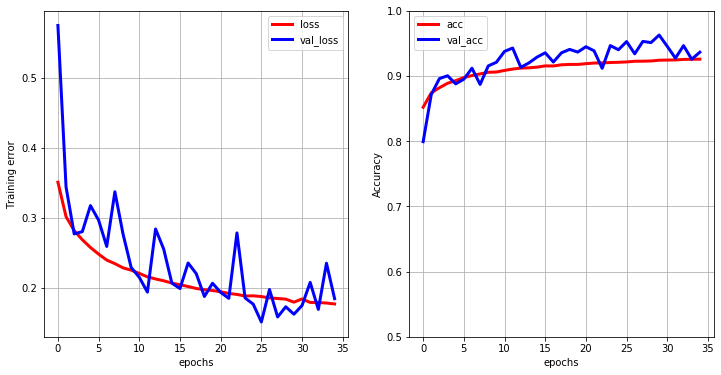

In [28]:
# Plot history

fig, axs = plt.subplots(1,2, figsize=(12,6))
print(fig)

#axs[0].rcParams['axes.labelsize'] = 15
axs[0].plot(history2.history['loss'],'red',linewidth=3.0, label="loss")
axs[0].plot(history2.history['val_loss'],'blue',linewidth=3.0, label="val_loss")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Training error')
axs[0].grid()

#axs[1].rcParams['axes.labelsize'] = 15
axs[1].plot(history2.history['accuracy'],'red',linewidth=3.0, label="acc")
axs[1].plot(history2.history['val_accuracy'],'blue',linewidth=3.0, label="val_acc")
axs[1].legend()
axs[1].set_ylim((0.5,1))
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')
axs[1].grid()


In [29]:
# Testen met test set
y_pred = model2.predict_classes(Xr_test)
#print(y_pred)

print("Accuracy score op test-set : ", accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))

print("\nConfusion matrix")
cf = confusion_matrix(y_test, y_pred)
print(cf)

df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(df_confusion)


Accuracy score op test-set :  90.4


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      9572
           1       0.19      0.39      0.26       428

    accuracy                           0.90     10000
   macro avg       0.58      0.66      0.60     10000
weighted avg       0.94      0.90      0.92     10000


Confusion matrix
[[8871  701]
 [ 259  169]]


Predicted,0,1
Actual,,
0,8871,701
1,259,169


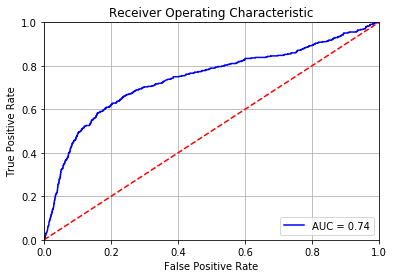

In [30]:
# ROC
probs = model2.predict_proba(Xr_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
# preds = probs[:,0]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=0)

roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()


# Conclusies customer satisfaction


### Data preparation
- inladen en splitsen in trai en test set
- heel veel kolommen met '0.0' als waarde, hier geen actie omdat onders geen data zal overschieten.
- check op gebalanceerdheid : **NIET** gebalanceerd --> problemen te verwachten
    - 96% tevreden klanten, 4% niet tevreden klanten
   



### Netwerk trainen zonder maatregelen voor ongebalanceerde data
- er wordt direct een accuracy van bijna 96% gehaald. 
- echter er zijn slechts 5 juiste ONtevreden klanten gevonden (1 = ontevreden), en 18 verkeerd voorspelde ontevreden klanten. Dit terwijl er 428 ontevreden klanten in de test-set zitten (~4% van 10.000)
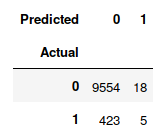
- de recall en f1-score zijn dan ook heel laag (f1(1) = 0.02) De f1 score voor de tevreden klanten is heel hoog natuurlijk : f1(0)=0.98.

Het model heeft grote bias naar de meest vookomende klasse. De dataset is heel ongebalanceerd, het doet er niet toe welk model je kiest, een score van 96% is gelijk aan altijd 'tevreden' zeggen. Kunnen we beter doen met maatregelen om de dataset gebalceerder te maken? 

### Netwerk trainen met class-weigths 

Het trainen van het netwerk met gebruik van class-weights : 
- de accuracy zakt naar 80%, echter er is minder bias naar de tevreden klanten
- de confusion matrix : 
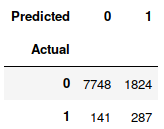

- de f1-score is dan ook hoger dan in het vorige geval : f1(1) = 0.23 Dit is niet hoog genoeg, maar toch reeds iets beter dan zonder gebruik te maken van class-weigths.
- er zijn reeds 287 van de 428 ontevreden klanten juist voorspeld, echter en komen een hoop (1824) verkeerde voospellingen van ontevreden bij. Hierdoor is de precision heel laag.

Het model verliest iets van zijn bias naar tevreden klanten, maar niet helemaal.

### Netwerk trainen met  BorderlineSMOTE resampling 


Bij het toepassen van BorderlineSMOTE resampling:
- de dataset is nu compleet gebalanceerd
- een dieper netwerk wordt gebruikt (2 hidden layers van 200 neuronen)
- de accuracy ligt tussen deze van de andere twee gevallen : 90%
- de f1 score voor ontevreden klanten is ook iets gestegen (f1(1)=  0.26. De false positives zijn sterk gedaald, echter de true positives ook. toch blijkt dit positief voor de f1-score (precision iets gestegen, recall iets gezakt, meetkundig gemiddelde = beter dan bij class-weights).
- confusion matrix:
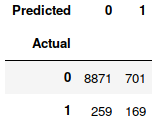



## Algemeen
Uit deze dataset is moeilijk op te maken of we met ontevreden klanten te maken hebben. Indien we een redelijk aantal ontevreden klanten willen opsporen, krijgen we een groot aantal verkeerde voorspellingen (een groot aantal tevreden klanten wordt als ontevreden bestempeld).  
- Als we zoveel mogelijk ontevreden klanten willen opsporen, en het minder belangrijk is een aantal verkeerde voorspellingen te doen, dan is de grootste recall van belang --> trainen met class-weights
- Als we ontvreden klanten willen opsoren, maar zo weinig mogelijk tevreden kalnten willen lastigvallen, dan is de precision belangrijker, en is borderlineSMOTE een iets betere oplossing. 

De ROC curves getekend tijdens het oplossen van de opdracht brengen niet veel inzicht in de situatie. Deze zijn hier niet echt bruikbaar voor het selecteren van een betere of slechtere classifier. Bij de meeste netwerken hier genruikt is wel wat overfitting te zien (niet gemakkelijk weg te werken met dropout), dit is volgens mij gerelateerd aan het feit dat de data zo ongebalanceerd is. 
